In [9]:
# coding: utf-8
# (c) 2016-02-10 Teruhisa Okada

%matplotlib inline

import netCDF4
import numpy as np
import matplotlib.pyplot as plt

import romspy

class Dataset():
    
    def __init__(self, ncfile, grdfile, mapfile):
        self.ncfile = ncfile
        self.grdfile = grdfile
        self.mapfile = mapfile
        self.nc = netCDF4.Dataset(self.ncfile, 'r')
        self.grid = self.get_grid()
        
    def get_grid(self):
        grd = netCDF4.Dataset(grdfile, 'r')
        h = grd['h'][:]
        cs_r = grd['Cs_r'][:]
        x_rho = grd['lon_rho'][0,:]
        y_rho = grd['lat_rho'][:,0]
        X, Y = np.meshgrid(x_rho, y_rho)
        grd.close()
        return h, cs_r, X, Y

    def check_time(self, which='ends', name='ocean_time'):
        print "check_time(which={}, name={}, tunit={})".format(which, name, romspy.JST)
        nc = self.nc
        if which == 'ends':
            t = len(nc.dimensions[name])
            start = nc.variables[name][0]
            end = nc.variables[name][t-1]
            print netCDF4.num2date(start, romspy.JST), 0
            print netCDF4.num2date(end, romspy.JST), t-1
        elif which == 'all':
            time = nc.variables[name][:]
            for t in range(len(time)):
                print netCDF4.num2date(time[t], romspy.JST), t
        else:
            print 'You should select "ends" or "all"'

    def get_var(self, vname, t):
        h, cs_r, X, Y = self.grid
        zeta = self.nc['zeta'][t,:,:]
        var3d = self.nc[vname][t,:,:,:]
        N, M, L = var3d.shape
        dep3d = np.zeros_like(var3d)
        for n in range(N):
            dep3d[n,:,:] = cs_r[n] * (zeta + h)
        return var3d, dep3d

    def sview(self, vname, t, k, **kw):
        cff = kw.pop('cff', 1.0)
        var3d, dep3d = nc.get_var(vname, t)
        S = var3d[k,:,:]*cff
        if k == 0:
            title = ' at {} layer'.format('bottom')
        elif k == 19:
            title = ' at {} layer'.format('surface')
        else:
            title = ' at {} layer'.format(k+1)
        self.hview(S, vname, t, title, **kw)

    def zview(self, vname, t, depth, **kw):
        cff = kw.pop('cff', 1.0)
        var3d, dep3d = nc.get_var(vname, t)
        Z = romspy.zslice(var3d*cff, dep3d, depth)
        title = ' at {} m from surface'.format(depth)
        self.hview(Z, vname, t, title, **kw)

    def hview(self, var2d, vname, t, title, **kw):
        alpha = kw.pop('alpha', 0.5)
        fmt = kw.pop('fmt', '%i')  # %.1f
        label = kw.pop('label', None)
        contour = kw.pop('contour', True)
        contourf = kw.pop('contourf', True)
        colorbar = kw.pop('colorbar', True)
        clabel = kw.pop('clabel', True)
        
        h, cs_r, X, Y = self.grid
        ax = plt.gca()
        if contour:
            CF = ax.contourf(X, Y, var2d, alpha=alpha, **kw)
        if contourf:
            C = ax.contour(X, Y, var2d, colors='k', **kw)
        if clabel:
            C.clabel(colors='k', fmt=fmt)
        if label is not None and colorbar:
            CB = plt.colorbar(CF)
            CB.ax.set_ylabel(label)
            title = label + title
        ax.set_title(title)
        romspy.basemap(self.mapfile)


#inifile = '/home/okada/Data/ob500_ini_param6-ini_20120101.nc'
inifile = '/home/okada/ism-i/apps/OB500P/testDA/param6-ini/output/ob500_ini_0.nc'
grdfile = '/home/okada/Data/ob500_grd-11_3.nc'
mapfile = '/home/okada/romspy/romspy/deg_OsakaBayMap_okada.bln'

nc = Dataset(inifile, grdfile, mapfile)
nc.check_time()
kw = {}

check_time(which=ends, name=ocean_time, tunit=seconds since 1968-05-23 09:00:00 GMT)
2012-01-01 00:00:00 0
2012-01-01 00:00:00 1


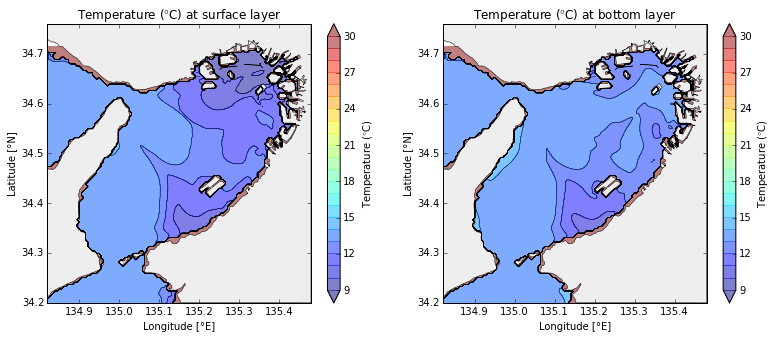

In [10]:
#romspy.cmap('RdBu_r')
romspy.cmap('jet')

vname = 'temp'
t = 0

kw['levels'] = np.arange(9,31,1)
kw['label'] = r'Temperature ($\degree$C)'
kw['extend'] = 'both'
kw['clabel'] = False
kw['linewidths'] = 0.5

fig, ax = plt.subplots(1,2,figsize=(13,5))
plt.subplot(1,2,1)
nc.sview(vname, t=t, k=19, **kw)

plt.subplot(1,2,2)
nc.sview(vname, t=t, k=0, **kw)

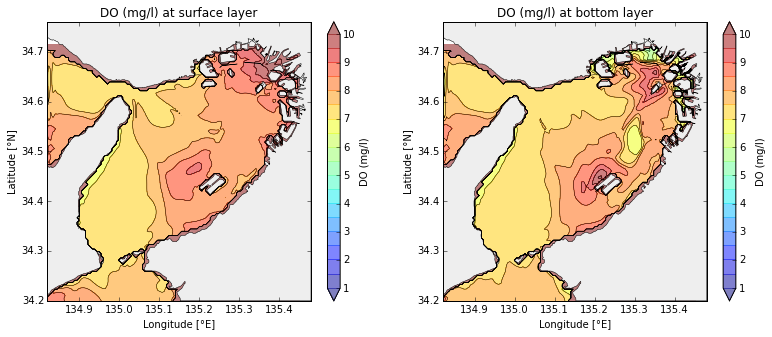

In [11]:
#romspy.cmap('RdBu_r')
vname = 'oxygen'
t = 0

kw['cff'] = romspy.mol2g_O2
kw['levels'] = np.arange(1,10.5,0.5)
kw['label'] = 'DO (mg/l)'
kw['extend'] = 'both'
kw['clabel'] = False

fig, ax = plt.subplots(1,2,figsize=(13,5))
plt.subplot(1,2,1)
nc.sview(vname, t=t, k=19, **kw)

plt.subplot(1,2,2)
nc.sview(vname, t=t, k=0, **kw)

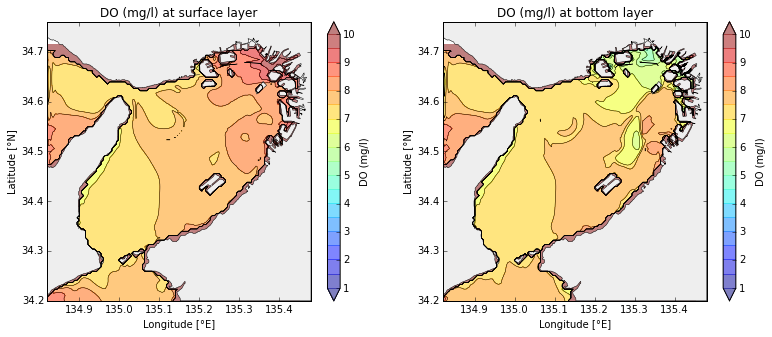

In [12]:
#romspy.cmap('RdBu_r')
vname = 'oxygen'
t = 1

kw['cff'] = romspy.mol2g_O2
kw['levels'] = np.arange(1,10.5,0.5)
kw['label'] = 'DO (mg/l)'
kw['extend'] = 'both'
kw['clabel'] = False

fig, ax = plt.subplots(1,2,figsize=(13,5))
plt.subplot(1,2,1)
nc.sview(vname, t=t, k=19, **kw)

plt.subplot(1,2,2)
nc.sview(vname, t=t, k=0, **kw)